In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

C:\Users\utkar\AppData\Local\Temp\ipykernel_13176\3551057582.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [20]:
df=pd.read_csv("TCS.csv", index_col=0,parse_dates=True,dayfirst=True)
#for this experiment I have used the market data of TCS of last 16 years

In [21]:
print("The shape of the data is : ", df.shape)
# we will consider close valueas the stock price for that day
df.head()

The shape of the data is :  (3947, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-29,328.750000,328.750000,322.750000,324.437500,238.659958,2982324
2007-01-31,324.274994,328.475006,318.000000,319.475006,235.009399,4865928
2007-02-01,322.487488,323.750000,318.750000,323.012512,237.611618,1859904
2007-02-02,324.750000,326.750000,323.762512,325.125000,239.165634,4274616
2007-02-05,326.250000,328.475006,323.500000,326.450012,240.140366,3010736


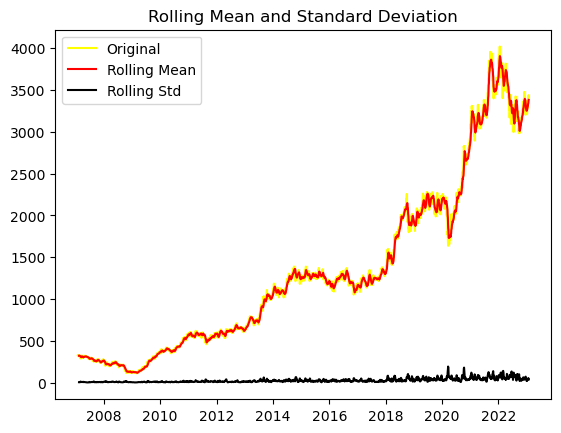

In [22]:
#ploting the curves

def statplots(timeseries):
    #Determing rolling statistics(mean and deviation):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False) 
statplots(df['Close'])

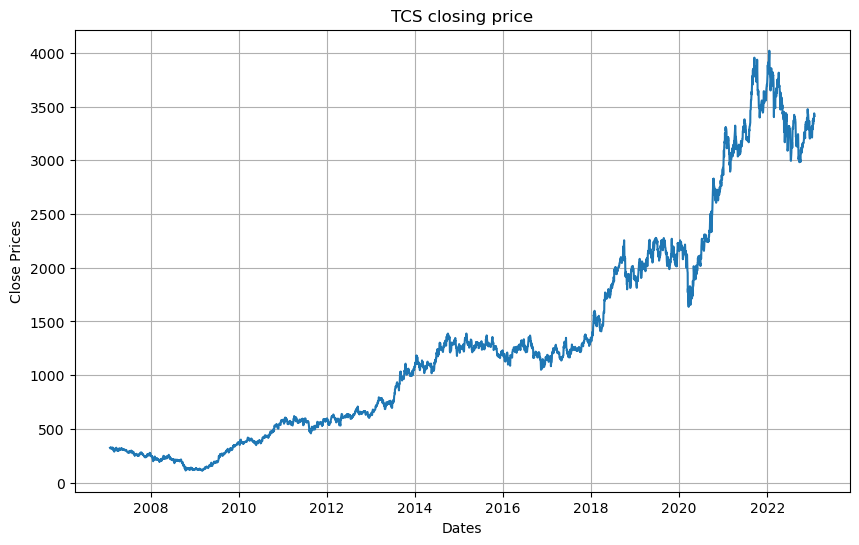

In [39]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('TCS closing price')
plt.show()

In [25]:
#dicky fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for adft will give us without defining what the values are.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

test_stationarity(df['Close'])

Results of dickey fuller test
Test Statistics                   0.806420
p-value                           0.991739
No. of lags used                 31.000000
Number of observations used    3915.000000
critical value (1%)              -3.432021
critical value (5%)              -2.862279
critical value (10%)             -2.567163
dtype: float64


In [26]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True)
stepwise_fit.summary()
#to find order of ARIMA(p,d,q)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36709.824, Time=11.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36718.429, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36719.903, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36719.863, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36720.182, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36717.621, Time=3.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36717.295, Time=5.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=36700.136, Time=12.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=36718.437, Time=2.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=36712.824, Time=6.98 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=36702.802, Time=5.31 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=36718.224, Time=2.51 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=36715.766, Time=3.14 sec
 ARIMA(2,1,3)(0,0,0)[0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3947
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -18343.068
Date:                Sun, 29 Jan 2023   AIC                          36700.136
Time:                        23:25:32   BIC                          36744.099
Sample:                             0   HQIC                         36715.731
                               - 3947                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2221      0.782      2.843      0.004       0.690       3.754
ar.L1          0.0057      0.011      0.527      0.598      -0.016       0.027
ar.L2         -0.9634      0.011    -91.467      0.000      -0.984      -0.943
ma.L1         -0.0189      0.015     -1.262      0.207      -0.048       0.010
ma.L2          0.9508      0.013     74.764      0.000       0.926       0.976
ma.L3         -0.0313      0.010     -3.188      0.001      -0.051      -0.012
sigma2       639.8729      6.053    105.712      0.000     628.009     651.737
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17464.56
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              25.51   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(3947, 6)
(3917, 6) (30, 6)


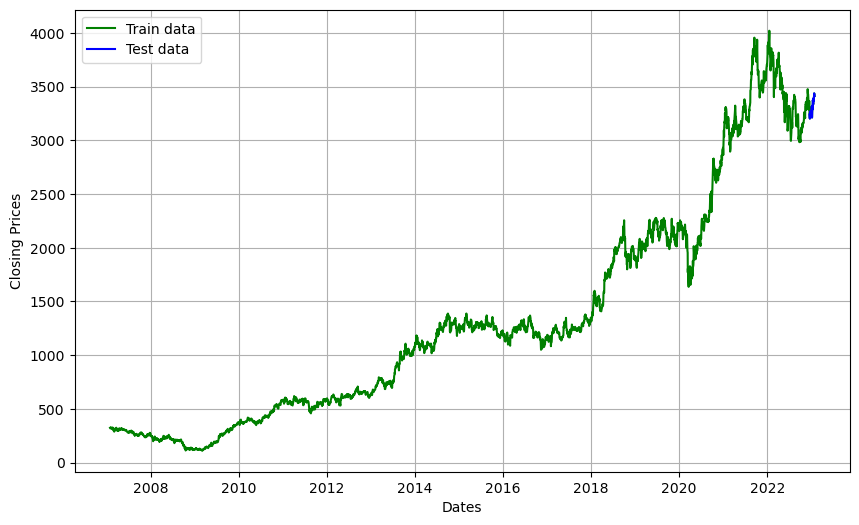

In [27]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'green', label='Train data')
plt.plot(test['Close'], 'blue', label='Test data')
plt.legend()

In [28]:
import statsmodels.api as sm
model=ARIMA(train['Close'], order=(2,1,3),)
#order values are from auto_arima
model=model.fit()
model.summary()

C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3917
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -18190.639
Date:                Sun, 29 Jan 2023   AIC                          36393.278
Time:                        23:26:03   BIC                          36430.915
Sample:                             0   HQIC                         36406.634
                               - 3917                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8773      0.034     25.805      0.000       0.811       0.944
ar.L2         -0.9005      0.032    -28.496      0.000      -0.962      -0.839
ma.L1         -0.8848      0.035    -25.245      0.000      -0.953      -0.816
ma.L2          0.8807      0.036     24.236      0.000       0.810       0.952
ma.L3          0.0111      0.010      1.074      0.283      -0.009       0.031
sigma2       635.3502      6.010    105.711      0.000     623.570     647.130
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18172.34
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              25.58   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type="levels")
pred.index=df.index[start:end+1]
#print(pred)

C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


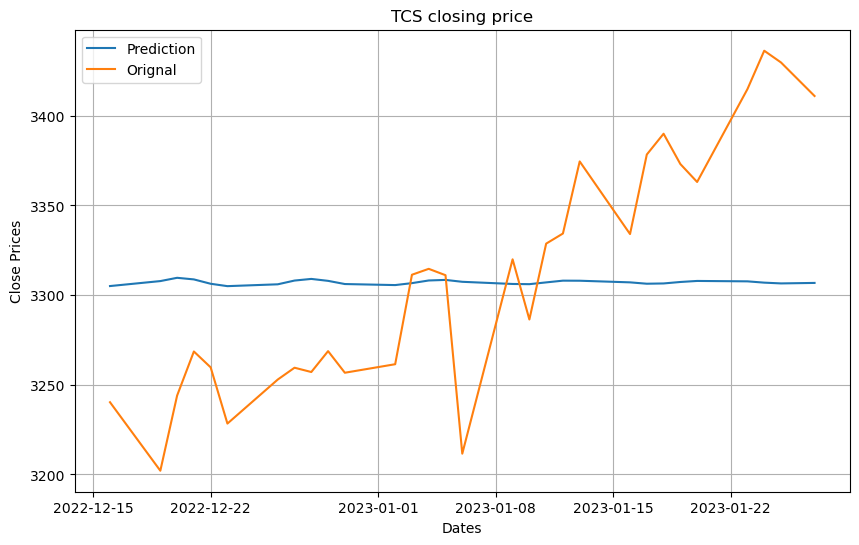

In [38]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(pred, label = "Prediction")
plt.plot(test['Close'], label="Orignal")
plt.legend(loc='best')
plt.title('TCS closing price')
plt.show()

In [31]:
from math import sqrt
rmse =sqrt(mean_squared_error(pred,test['Close']))
print("rmse value of data is : ", rmse)
print("average value of data is : ", test['Close'].mean())
#The model is not good IF rmse is the very similar in range of the average value

rmse value of data is :  66.62159502616096
average value of data is :  3310.7500081666667


In [35]:
modelf=ARIMA(df['Close'], order=(2,1,3))
#order values are from auto_arima
modelf=modelf.fit()
df.tail()

C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-20,3365.000000,3394.649902,3355.600098,3363.100098,3363.100098,1529349
2023-01-23,3388.000000,3419.000000,3355.600098,3414.899902,3414.899902,1067916
2023-01-24,3425.000000,3451.949951,3417.300049,3436.300049,3436.300049,1387863
2023-01-25,3425.300049,3435.000000,3405.000000,3429.750000,3429.750000,874110
2023-01-27,3426.000000,3446.000000,3382.300049,3411.050049,3411.050049,1785879


In [36]:
index_futdates = pd.date_range(start='2023-01-29', end='2023-02-28')
predf=modelf.predict(start=len(df),end=len(df) +30,type='levels').rename('ARIMA Prediction')
predf.index=index_futdates
#print(predf)

C:\Users\utkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


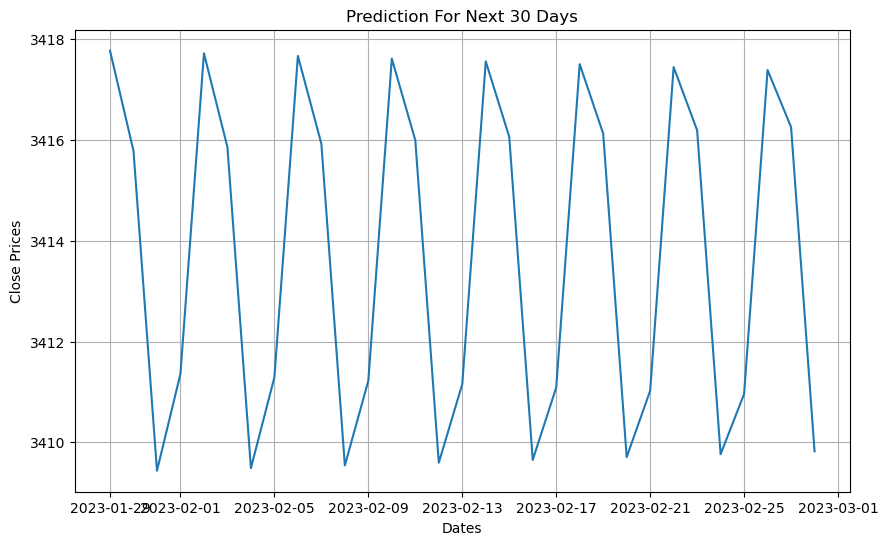

In [37]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(predf, label = "Prediction")
plt.title('Prediction For Next 30 Days')
plt.show()

In [17]:
#Project by Utkarsh Pant
#Roll No. : 22B0914     Department: CSE
#Project: Stock Market Prediction Using Time Series(WIDS 28)
